**The accident history file1 contains data on accidents in England and the England geographic data file2 is also available.**

**a) Identify high-risk areas where many accidents have occurred and display them on the map. Various methods can be used to perform this analysis. Try to clearly identify high-risk areas in the selected method.**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install geopandas
!pip install geoplot
!pip install crs
!unzip "drive/MyDrive/Datasets/Datasets_HW1.zip" -d "datasets"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 48.9 MB/s eta 0:00:00
Archive:  drive/MyDrive/Datasets/Datasets_HW1.zip
   creating: datasets/Datasets_HW1/
  inflating: datasets/Datasets_HW1/Accident.csv  
  inflating: datasets/Datasets_HW1/Accident_London.csv  
  inflating: datasets/Datasets_HW1/district.json  
  inflating: datasets/Datasets_HW1/london_district.json  


[]

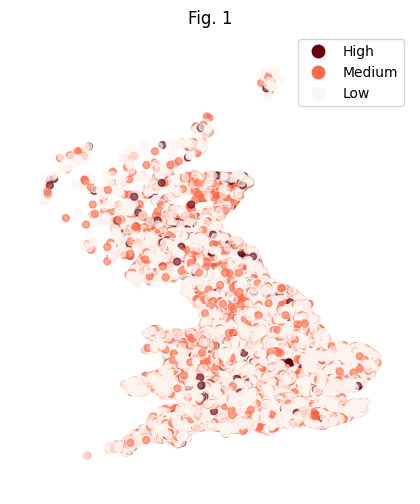

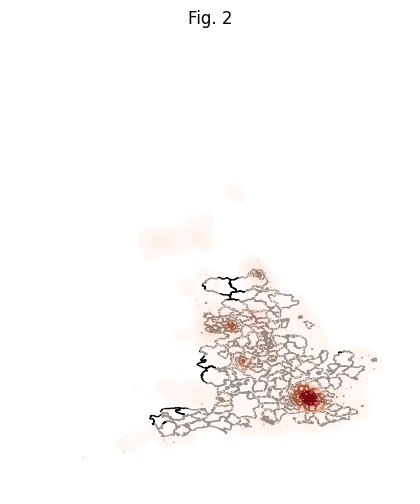

In [ ]:
import geopandas as gpd
import geoplot as gplt
import pandas as pd
from shapely.geometry import Point
import mapclassify as mc
import matplotlib.pyplot as plt

# Read district GeoJSON file
district_map = gpd.read_file("datasets/Datasets_HW1/district.json")

# Read accident data
accident_data = pd.read_csv("datasets/Datasets_HW1/Accident.csv")

# Convert Longitude and Latitude to Point geometries
accident_points = accident_data.apply(
    lambda srs: Point(float(srs["Longitude"]), float(srs["Latitude"])),
    axis='columns'
)

# Check and convert MultiPolygons to Polygons
for index, row in district_map.iterrows():
    if row['geometry'].geom_type == 'MultiPolygon':
        district_map.at[index, 'geometry'] = row['geometry'].geoms[0]

# Create a GeoDataFrame from accident data with Point geometries
data_geocoded = gpd.GeoDataFrame(accident_data, geometry=accident_points)

# Define classification scheme for accident severity
scheme = mc.UserDefined(data_geocoded['Accident_Severity'], bins=[1, 2, 3])

# Plot the district map with accident points colored by severity
ax = gplt.polyplot(district_map)
gplt.pointplot(
    data_geocoded,
    hue='Accident_Severity',
    scheme=scheme,
    legend=True,
    cmap='Reds_r',
    ax=ax,
    alpha=0.6,
    legend_labels=['High', 'Medium', 'Low']
)

# Plot kernel density estimation of accident points
plt.title('Fig. 1')
ax = gplt.polyplot(district_map)

plt.title('Fig. 2')
gplt.kdeplot(data_geocoded, fill=True, cmap='Reds', ax=ax, alpha=0.6)
plt.plot()

All accidents are shown as points with different colors for each accident type in Fig. 1. Also, the heat map of accident-prone areas is observable in Fig. 2.

**b) Extract the temporal pattern of accidents. For accurate analysis, time can be considered in different seasonal, monthly, daily, and hourly intervals.**

[]

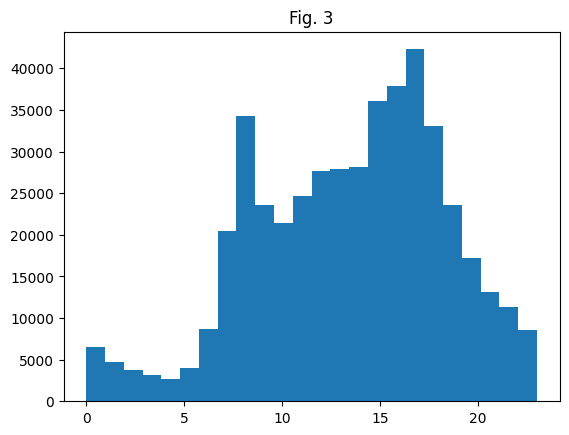

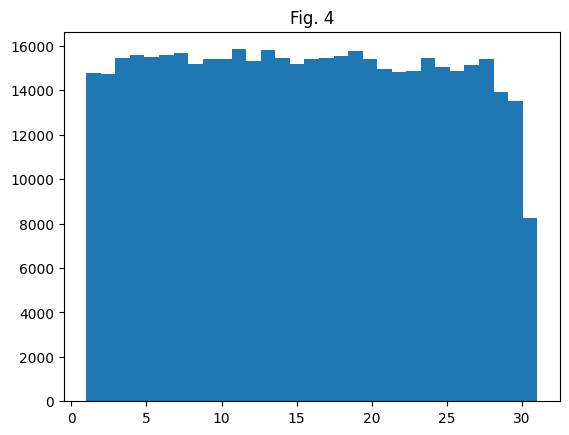

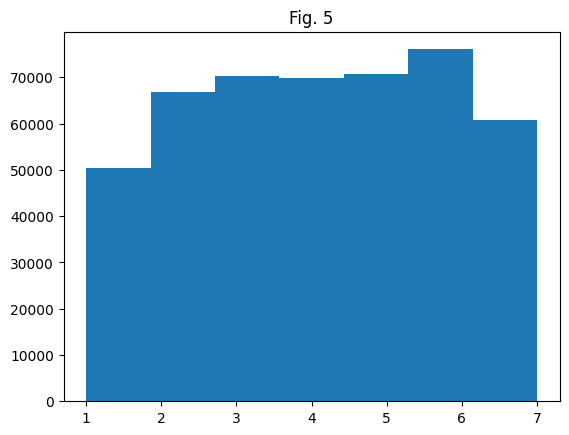

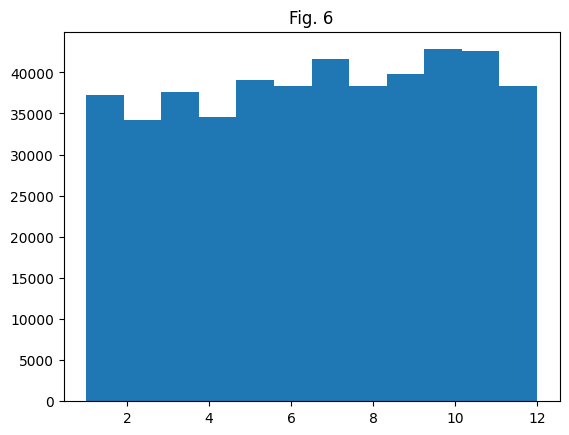

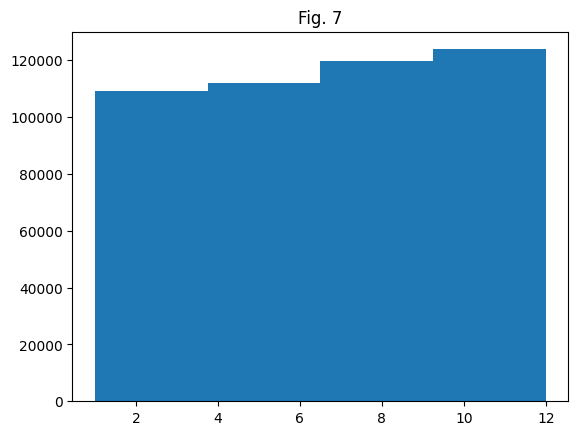

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

# Read the CSV file into a pandas DataFrame
data = pd.read_csv("datasets/Datasets_HW1/Accident.csv")

# Extract hour from the 'Time' column and create a histogram
f = []
for row in data["Time"]:
    try:
        hour = row[0:row.find(':')]
        f.append(float(hour))
    except:
        pass

plt.figure()
plt.title("Fig. 3")
plt.hist(f, 24)  # Plot histogram with 24 bins for hours
plt.plot()

# Extract day from the 'Date' column and create a histogram
f = []
for row in data["Date"]:
    try:
        day = row[0:row.find('/')]
        f.append(float(day))
    except:
        pass

plt.figure()
plt.title("Fig. 4")
plt.hist(f, 31)  # Plot histogram with 31 bins for days
plt.plot()

# Extract day of the week and create a histogram
f = []
for row in data["Day_of_Week"]:
    try:
        f.append(float(row))
    except:
        pass

plt.figure()
plt.title("Fig. 5")
plt.hist(f, 7)  # Plot histogram with 7 bins for days of the week
plt.plot()

# Extract month from the 'Date' column and create a histogram
f = []
for row in data["Date"]:
    try:
        substr = row[row.find('/') + 1:]
        month = substr[:substr.find('/')]
        f.append(float(month))
    except:
        pass

plt.figure()
plt.title("Fig. 6")
plt.hist(f, 12)  # Plot histogram with 12 bins for months
plt.plot()

# Extract year from the 'Date' column and create a histogram
f = []
for row in data["Date"]:
    try:
        substr = row[row.find('/') + 1:]
        month = substr[:substr.find('/')]
        f.append(float(month))
    except:
        pass

plt.figure()
plt.title("Fig. 7")
plt.hist(f, 4)  # Plot histogram with 4 bins for seasons
plt.plot()

Accident occurrence patterns are presented in chronological order: hourly, daily, weekly, monthly, and seasonally, as shown in the following charts. In Fig. 3, it is observed that accidents are more frequent during peak traffic hours (morning and afternoon), attributable to increased vehicular traffic volume. In Fig. 4, no specific pattern for accident occurrences is evident. The decrease in accidents towards the end of the month is due to differences in the number of days in different months. Fig. 5 illustrates an increase in accident volume during the last working days, possibly related to fatigue accumulated during the week, although its accuracy should be validated using statistical methods. In Fig. 6 and Fig. 7, it can be observed that during the last season and the final months of the year, when vehicular traffic increases due to holidays, there is a higher occurrence of accidents.

**c) The accident severity column3 contains data on the severity of accidents, which is valued in descending order (number 1 indicates the most severe accidents). Is there a meaningful pattern between accident severity and their occurrence time? Analyze your findings.**

[]

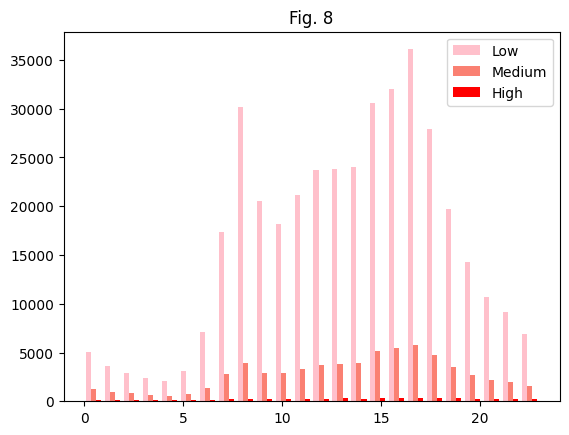

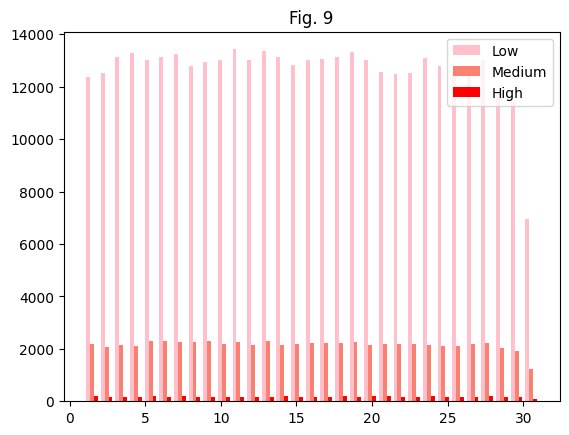

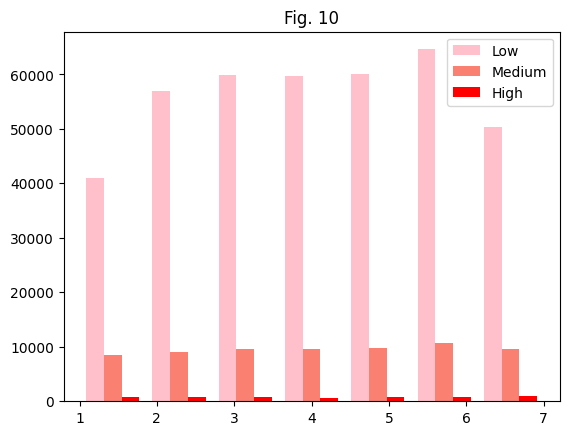

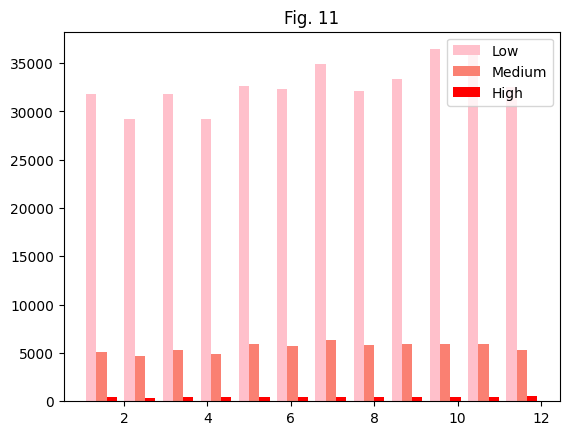

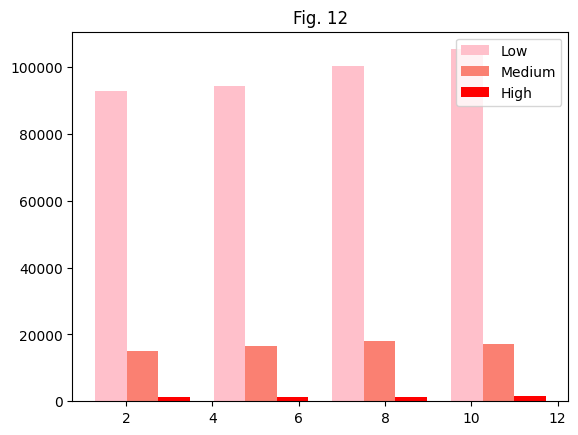

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

# Read the CSV file into a pandas DataFrame
data = pd.read_csv("datasets/Datasets_HW1/Accident.csv")

# Histogram for Accident Time
f = {}
colors = ['pink', 'salmon', 'red']
labels = ['Low', 'Medium', 'High']
for index, row in enumerate(data["Time"]):
    try:
        severity = data["Accident_Severity"][index]
        if severity not in f:
            f[severity] = []
        hour = row[0:row.find(':')]
        f[severity].append(float(hour))
    except:
        pass

plt.figure()
plt.title("Fig. 8")
plt.hist(f.values(), bins=24, color=colors)  # Plot histogram for time
plt.legend(labels)
plt.plot()

# Histogram for Accident Date
f = {}
colors = ['pink', 'salmon', 'red']
labels = ['Low', 'Medium', 'High']
for index, row in enumerate(data["Date"]):
    try:
        severity = data["Accident_Severity"][index]
        if severity not in f:
            f[severity] = []
        day = row[0:row.find('/')]
        f[severity].append(float(day))
    except:
        pass

plt.figure()
plt.title("Fig. 9")
plt.hist(f.values(), bins=31, color=colors)  # Plot histogram for date
plt.legend(labels)
plt.plot()

# Histogram for Day of the Week
f = {}
colors = ['pink', 'salmon', 'red']
labels = ['Low', 'Medium', 'High']
for index, row in enumerate(data["Day_of_Week"]):
    try:
        severity = data["Accident_Severity"][index]
        if severity not in f:
            f[severity] = []
        f[severity].append(float(row))
    except:
        pass

plt.figure()
plt.title("Fig. 10")
plt.hist(f.values(), bins=7, color=colors)  # Plot histogram for day of the week
plt.legend(labels)
plt.plot()

# Histogram for Accident Month
f = {}
colors = ['pink', 'salmon', 'red']
labels = ['Low', 'Medium', 'High']
for index, row in enumerate(data["Date"]):
    try:
        severity = data["Accident_Severity"][index]
        if severity not in f:
            f[severity] = []
        substr = row[row.find('/') + 1:]
        month = substr[:substr.find('/')]
        f[severity].append(float(month))
    except:
        pass

plt.figure()
plt.title("Fig. 11")
plt.hist(f.values(), bins=12, color=colors)  # Plot histogram for month
plt.legend(labels)
plt.plot()

# Histogram for Accident Year
f = {}
colors = ['pink', 'salmon', 'red']
labels = ['Low', 'Medium', 'High']
for index, row in enumerate(data["Date"]):
    try:
        severity = data["Accident_Severity"][index]
        if severity not in f:
            f[severity] = []
        substr = row[row.find('/') + 1:]
        month = substr[:substr.find('/')]
        f[severity].append(float(month))
    except:
        pass

plt.figure()
plt.title("Fig. 12")
plt.hist(f.values(), bins=4, color=colors)  # Plot histogram for year
plt.legend(labels)
plt.plot()

The pattern of accidents' occurrence and their intensity is presented in the form of charts in chronological order: hourly, daily, monthly, and seasonally. Similar to the previous section, in Fig. 8, it is observed that the number of accidents during peak traffic hours shows higher values. Additionally, in Fig. 9, again, there is no distinct pattern for the number and severity of accidents across the days of the month. In Fig. 10, there is an increase in the number of accidents during the end-of-week days. Fig. 11 and Fig. 12 are justified similarly to the previous section.

**d) The junction control column4 contains data on the traffic control status of accident locations. Is there a significant relationship between supervision method, number of accidents, and their severity? Explain.**

[]

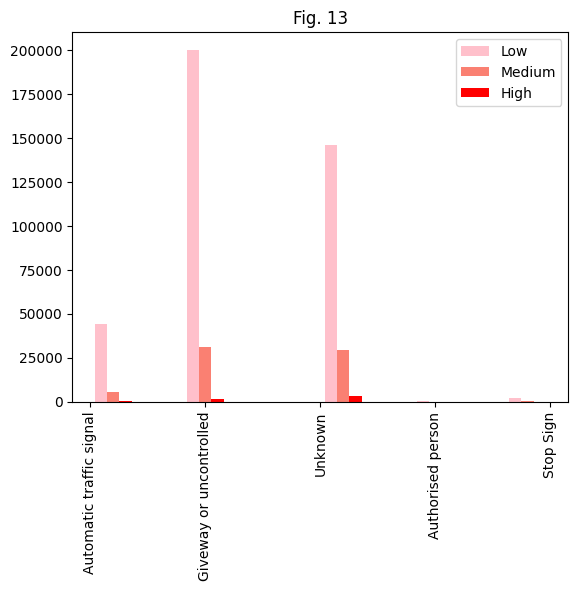

In [ ]:
from matplotlib import pyplot as plt
import pandas as pd
import math
import seaborn as sns

# Read the CSV file into a pandas DataFrame
data = pd.read_csv("datasets/Datasets_HW1/Accident.csv")

# Initialize an empty dictionary and color labels
f = {}
colors = ["pink", "salmon", "red"]
labels = ['Low', 'Medium', 'High']

# Iterate through the 'Junction_Control' column and create a histogram for Accident Severity
for index, row in enumerate(data["Junction_Control"]):
    severity = data["Accident_Severity"][index]

    # Check if the value is NaN or not a string, if so, replace it with "Unknown"
    if type(row) != str and math.isnan(row):
        row = "Unknown"

    # Initialize a list for each severity level if not present in the dictionary
    if severity not in f:
        f[severity] = []

    # Append the value to the respective severity level
    f[severity].append(row)

# Plot a histogram with the collected values
plt.title("Fig. 13")
plt.hist(f.values(), color=colors)
plt.legend(labels)
plt.xticks(rotation='vertical')  # Rotate x-axis labels vertically for better readability
plt.plot()

**e) Is a significant relationship observed between the number and severity of accidents and environmental factors such as street lighting and slipperiness?**

The pattern of the impact of intersection type on the number of accidents, categorized by severity, is observable in Fig. 13. Due to the lack of specific intersection counts categorized by control type, it is not straightforward to discuss the chart in this section. However, it is generally evident that intersections without any form of control have a higher potential for accidents to occur.

[]

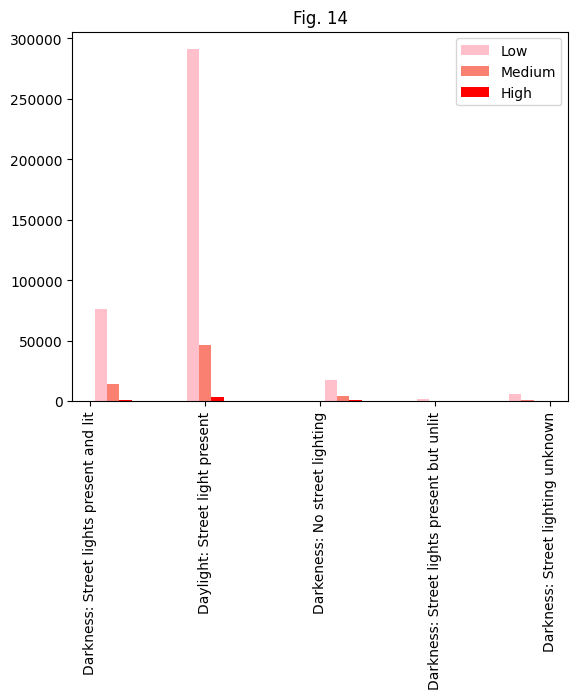

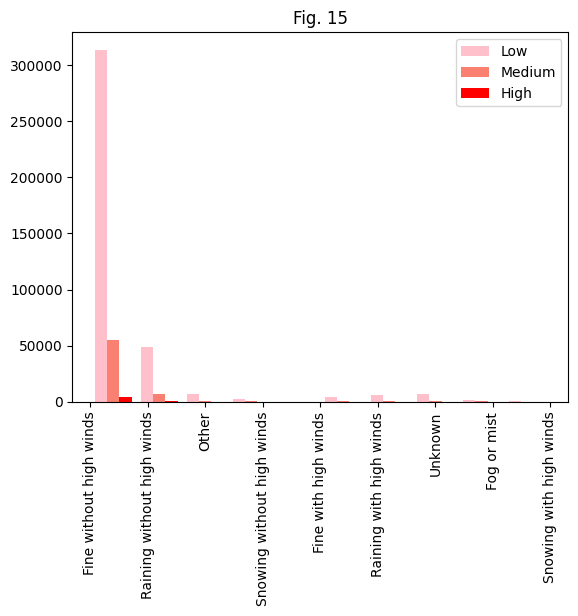

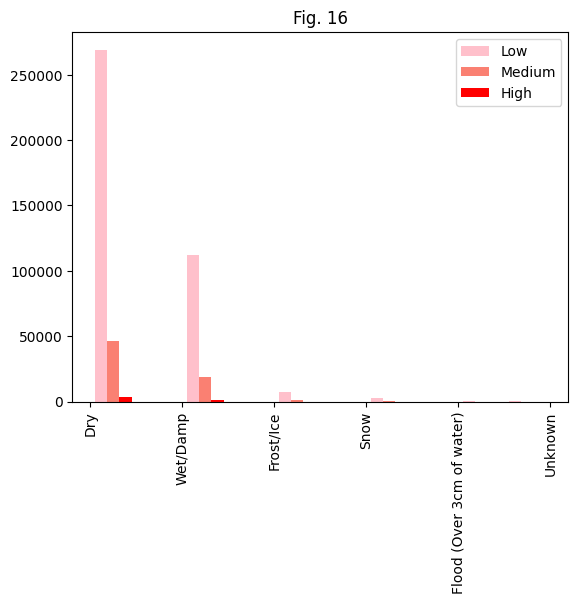

In [ ]:
from matplotlib import pyplot as plt
import pandas as pd
import math

# Read the CSV file into a pandas DataFrame
data = pd.read_csv("datasets/Datasets_HW1/Accident.csv")

# Plot histogram for Light Conditions
f = {}
colors = ['pink', 'salmon', 'red']
labels = ['Low', 'Medium', 'High']
for index, row in enumerate(data["Light_Conditions"]):
    severity = data["Accident_Severity"][index]

    # Check for NaN or non-string values and replace with "Unknown"
    if type(row) != str and math.isnan(row):
        row = "Unknown"

    # Initialize a list for each severity level if not present in the dictionary
    if severity not in f:
        f[severity] = []

    # Append the value to the respective severity level
    f[severity].append(row)

# Plot histogram for Light Conditions
plt.figure()
plt.title("Fig. 14")
plt.hist(f.values(), color=colors)
plt.legend(labels)
plt.xticks(rotation='vertical')  # Rotate x-axis labels vertically for better readability
plt.plot()

# Plot histogram for Weather Conditions
f = {}
for index, row in enumerate(data["Weather_Conditions"]):
    severity = data["Accident_Severity"][index]
    if type(row) != str and math.isnan(row):
        row = "Unknown"
    if severity not in f:
        f[severity] = []
    f[severity].append(row)

plt.figure()
plt.title("Fig. 15")
plt.hist(f.values(), color=colors)
plt.legend(labels)
plt.xticks(rotation='vertical')
plt.plot()

# Plot histogram for Road Surface Conditions
f = {}
for index, row in enumerate(data["Road_Surface_Conditions"]):
    severity = data["Accident_Severity"][index]
    if type(row) != str and math.isnan(row):
        row = "Unknown"
    if severity not in f:
        f[severity] = []
    f[severity].append(row)

plt.figure()
plt.title("Fig. 16")
plt.hist(f.values(), color=colors)
plt.legend(labels)
plt.xticks(rotation='vertical')
plt.plot()

The patterns of the impact of lighting, weather conditions, and road surface slipperiness at the accident location on the number of accidents, categorized by severity, are observable in Fig. 14. In this section, due to the lack of specific intersection counts under these conditions, it is not straightforward to determine the influence of these conditions on the number and severity of accidents. It's possible that days with dry road surfaces have significantly more data compared to days with wet and slippery road surfaces, potentially influencing the observed patterns.

**f) The London accident history file5 contains London accident data and the London geographic information file6 is available. Calculate the accident density (number per unit area) in different neighborhoods of London and plot the risk map of London accidents. Identify the type of street where severe London accidents have occurred. Column 7 can be used for this purpose.**

[]

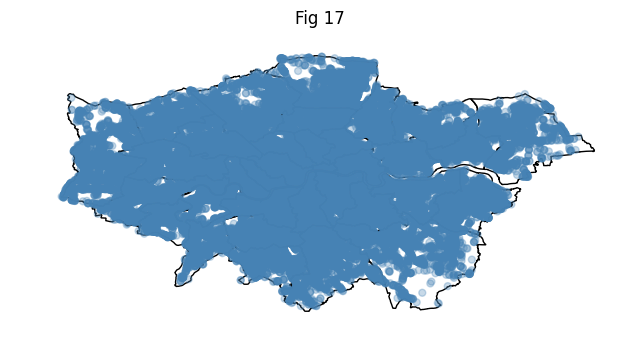

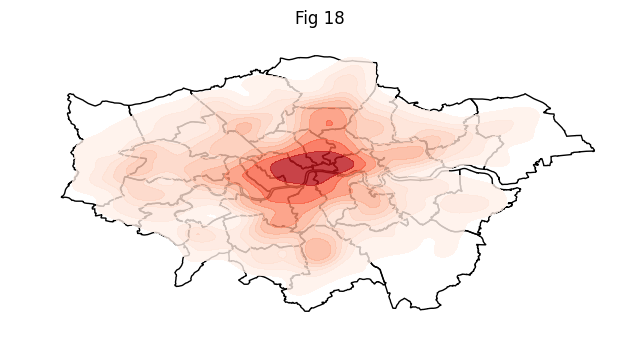

In [14]:
import geopandas as gpd
import geoplot as gplt
import pandas as pd
from shapely.geometry import Point, Polygon, MultiPolygon
import matplotlib.pyplot as plt

# Read the London district map GeoJSON file
map = gpd.read_file("datasets/Datasets_HW1/london_district.json")

# Read the London accident data CSV file
data = pd.read_csv("datasets/Datasets_HW1/Accident_London.csv")

# Check and convert MultiPolygons to Polygons
for index, row in map.iterrows():
    if row['geometry'].geom_type == 'MultiPolygon':
        map.at[index, 'geometry'] = row['geometry'].geoms[0]

# Create Point geometries for accident locations using x and y coordinates
accident_points = data.apply(
    lambda srs: Point(float(srs["x"]), float(srs["y"])),
    axis='columns'
)

# Create a GeoDataFrame with the accident data and Point geometries
data_geocoded = gpd.GeoDataFrame(data, geometry=accident_points)

# Plot the London district map with accident points plotted over it
ax = gplt.polyplot(map)
gplt.pointplot(data_geocoded, ax=ax, alpha=0.3)
plt.title("Fig 17")

# Plot the kernel density estimation (KDE) of accident points
ax = gplt.polyplot(map)
gplt.kdeplot(data_geocoded, fill=True, cmap='Reds', ax=ax, alpha=0.8)
plt.title("Fig 18")
plt.plot()